In [1]:
import warnings;
warnings.simplefilter('ignore')

In [5]:
import pandas as pd
df = pd.read_csv("D:\\Gold_data.csv")

In [6]:
df.dtypes

date      object
price    float64
dtype: object

In [9]:
df.describe()

,price
count,2182.000000
mean,3284.450046
std,719.564434
min,2252.600000
25%,2697.020000
50%,2879.800000
75%,4147.325000
max,4966.300000


In [10]:
df.columns = ['ds', 'y']

In [11]:
df.head()

,ds,y
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75


# Train Model

In [13]:
from prophet import Prophet

In [14]:
m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(df)

10:03:16 - cmdstanpy - INFO - Chain [1] start processing
10:03:20 - cmdstanpy - INFO - Chain [1] done processing


In [34]:
future = m.make_future_dataframe(periods=100, freq='D')
forecast = m.predict(future)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-01,2316.778950,2293.459091,2935.749057,2316.778950,2316.778950,306.750959,306.750959,306.750959,276.048806,...,-3.694853,-3.694853,-3.694853,34.397007,34.397007,34.397007,0.0,0.0,0.0,2623.529909
1,2016-01-02,2317.523583,2325.665257,2978.701261,2317.523583,2317.523583,316.321284,316.321284,316.321284,276.048806,...,1.161941,1.161941,1.161941,39.110536,39.110536,39.110536,0.0,0.0,0.0,2633.844867
2,2016-01-03,2318.268216,2306.426151,2966.387208,2318.268216,2318.268216,317.486149,317.486149,317.486149,276.048806,...,-1.389081,-1.389081,-1.389081,42.826425,42.826425,42.826425,0.0,0.0,0.0,2635.754366
3,2016-01-04,2319.012849,2321.702069,2990.390232,2319.012849,2319.012849,321.754844,321.754844,321.754844,276.048806,...,0.189236,0.189236,0.189236,45.516802,45.516802,45.516802,0.0,0.0,0.0,2640.767693
4,2016-01-05,2319.757482,2313.463805,2992.901039,2319.757482,2319.757482,324.404062,324.404062,324.404062,276.048806,...,1.180915,1.180915,1.180915,47.174341,47.174341,47.174341,0.0,0.0,0.0,2644.161544


In [35]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-01,2316.778950,2293.459091,2935.749057,2316.778950,2316.778950,306.750959,306.750959,306.750959,276.048806,...,-3.694853,-3.694853,-3.694853,34.397007,34.397007,34.397007,0.0,0.0,0.0,2623.529909
1,2016-01-02,2317.523583,2325.665257,2978.701261,2317.523583,2317.523583,316.321284,316.321284,316.321284,276.048806,...,1.161941,1.161941,1.161941,39.110536,39.110536,39.110536,0.0,0.0,0.0,2633.844867
2,2016-01-03,2318.268216,2306.426151,2966.387208,2318.268216,2318.268216,317.486149,317.486149,317.486149,276.048806,...,-1.389081,-1.389081,-1.389081,42.826425,42.826425,42.826425,0.0,0.0,0.0,2635.754366
3,2016-01-04,2319.012849,2321.702069,2990.390232,2319.012849,2319.012849,321.754844,321.754844,321.754844,276.048806,...,0.189236,0.189236,0.189236,45.516802,45.516802,45.516802,0.0,0.0,0.0,2640.767693
4,2016-01-05,2319.757482,2313.463805,2992.901039,2319.757482,2319.757482,324.404062,324.404062,324.404062,276.048806,...,1.180915,1.180915,1.180915,47.174341,47.174341,47.174341,0.0,0.0,0.0,2644.161544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2277,2022-03-27,3955.894016,3854.281006,4508.582173,3886.695807,4026.337912,222.749184,222.749184,222.749184,276.048806,...,-1.389081,-1.389081,-1.389081,-51.910540,-51.910540,-51.910540,0.0,0.0,0.0,4178.643201
2278,2022-03-28,3955.674810,3858.381412,4525.150381,3885.408484,4026.998232,226.819109,226.819109,226.819109,276.048806,...,0.189236,0.189236,0.189236,-49.418932,-49.418932,-49.418932,0.0,0.0,0.0,4182.493920
2279,2022-03-29,3955.455604,3835.477293,4524.254061,3884.123833,4027.658552,230.771362,230.771362,230.771362,276.048806,...,1.180915,1.180915,1.180915,-46.458358,-46.458358,-46.458358,0.0,0.0,0.0,4186.226966
2280,2022-03-30,3955.236398,3856.380559,4524.461502,3882.839182,4028.318872,233.875860,233.875860,233.875860,276.048806,...,0.885560,0.885560,0.885560,-43.058505,-43.058505,-43.058505,0.0,0.0,0.0,4189.112258


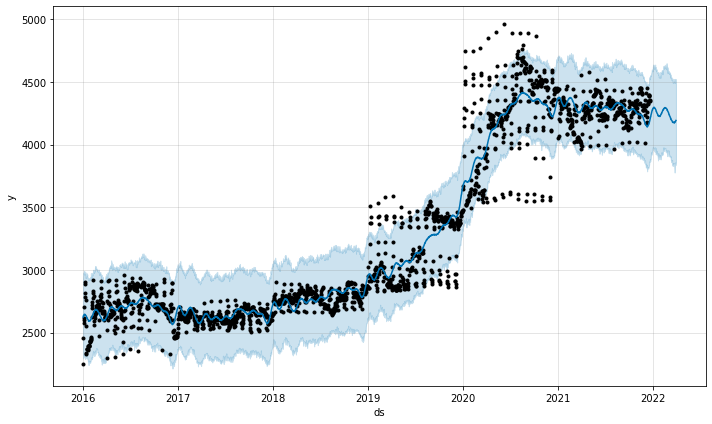

In [36]:
plot1 = m.plot(forecast)

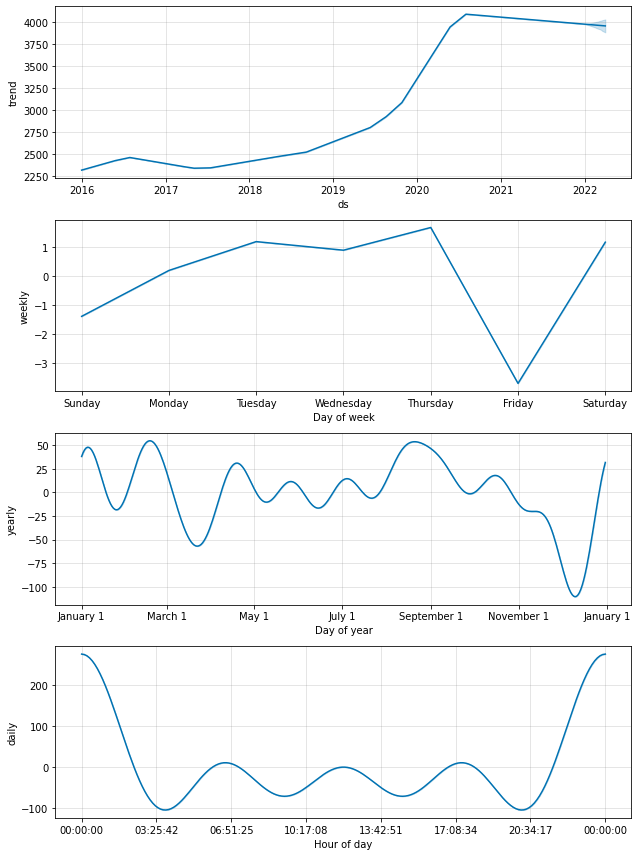

In [37]:
plot2 = m.plot_components(forecast)

In [38]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-01,2316.778950,2293.459091,2935.749057,2316.778950,2316.778950,306.750959,306.750959,306.750959,276.048806,...,-3.694853,-3.694853,-3.694853,34.397007,34.397007,34.397007,0.0,0.0,0.0,2623.529909
1,2016-01-02,2317.523583,2325.665257,2978.701261,2317.523583,2317.523583,316.321284,316.321284,316.321284,276.048806,...,1.161941,1.161941,1.161941,39.110536,39.110536,39.110536,0.0,0.0,0.0,2633.844867
2,2016-01-03,2318.268216,2306.426151,2966.387208,2318.268216,2318.268216,317.486149,317.486149,317.486149,276.048806,...,-1.389081,-1.389081,-1.389081,42.826425,42.826425,42.826425,0.0,0.0,0.0,2635.754366
3,2016-01-04,2319.012849,2321.702069,2990.390232,2319.012849,2319.012849,321.754844,321.754844,321.754844,276.048806,...,0.189236,0.189236,0.189236,45.516802,45.516802,45.516802,0.0,0.0,0.0,2640.767693
4,2016-01-05,2319.757482,2313.463805,2992.901039,2319.757482,2319.757482,324.404062,324.404062,324.404062,276.048806,...,1.180915,1.180915,1.180915,47.174341,47.174341,47.174341,0.0,0.0,0.0,2644.161544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2277,2022-03-27,3955.894016,3854.281006,4508.582173,3886.695807,4026.337912,222.749184,222.749184,222.749184,276.048806,...,-1.389081,-1.389081,-1.389081,-51.910540,-51.910540,-51.910540,0.0,0.0,0.0,4178.643201
2278,2022-03-28,3955.674810,3858.381412,4525.150381,3885.408484,4026.998232,226.819109,226.819109,226.819109,276.048806,...,0.189236,0.189236,0.189236,-49.418932,-49.418932,-49.418932,0.0,0.0,0.0,4182.493920
2279,2022-03-29,3955.455604,3835.477293,4524.254061,3884.123833,4027.658552,230.771362,230.771362,230.771362,276.048806,...,1.180915,1.180915,1.180915,-46.458358,-46.458358,-46.458358,0.0,0.0,0.0,4186.226966
2280,2022-03-30,3955.236398,3856.380559,4524.461502,3882.839182,4028.318872,233.875860,233.875860,233.875860,276.048806,...,0.885560,0.885560,0.885560,-43.058505,-43.058505,-43.058505,0.0,0.0,0.0,4189.112258


In [28]:
forecast[['ds','yhat']]

,ds,yhat
0,2016-01-01,2623.529909
1,2016-01-02,2633.844867
2,2016-01-03,2635.754366
3,2016-01-04,2640.767693
4,2016-01-05,2644.161544
...,...,...
2277,2022-03-27,4178.643201
2278,2022-03-28,4182.493920
2279,2022-03-29,4186.226966
2280,2022-03-30,4189.112258


In [33]:
import pickle
pickle.dump(forecast, open('model1.pkl','wb'))